In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Dataset:¶<br>
state: Various states of U.S.<br>
numcol: Number of honey-producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies that did not survive the entire year<br>
yieldpercol: Honey yield per colony. Unit is pounds<br>
totalprod: Total production (numcol x yieldpercol). Unit is pounds<br>
stocks: Refers to stocks held by producers. Unit is pounds<br>
priceperlb: Refers to average price per pound based on expanded sales. The unit is dollars.<br>
prodvalue: Value of production (totalprod x priceperlb). The unit is dollars.<br>
year: Year of production<br>

In [2]:
honi_data = pd.read_csv("honeyproduction.csv")
honi_data

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


In [3]:
honi_data['year'].unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012])

In [4]:
honi_data.dtypes

state           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

without year

In [5]:
nyrdata = honi_data.iloc[:,:-1]

In [6]:
nyrdata.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07


In [ ]:
sns.pairplot(nyrdata,diag_kind='kde')
plt.show()

/Users/darshmac/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [8]:
allcorln = nyrdata.corr()
allcorln

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
numcol,1.000000,0.243515,0.953594,0.825929,-0.232701,0.912796
yieldpercol,0.243515,1.000000,0.396252,0.367812,-0.358646,0.278977
totalprod,0.953594,0.396252,1.000000,0.878830,-0.264499,0.907236
stocks,0.825929,0.367812,0.878830,1.000000,-0.305867,0.728560
priceperlb,-0.232701,-0.358646,-0.264499,-0.305867,1.000000,-0.089567
prodvalue,0.912796,0.278977,0.907236,0.728560,-0.089567,1.000000


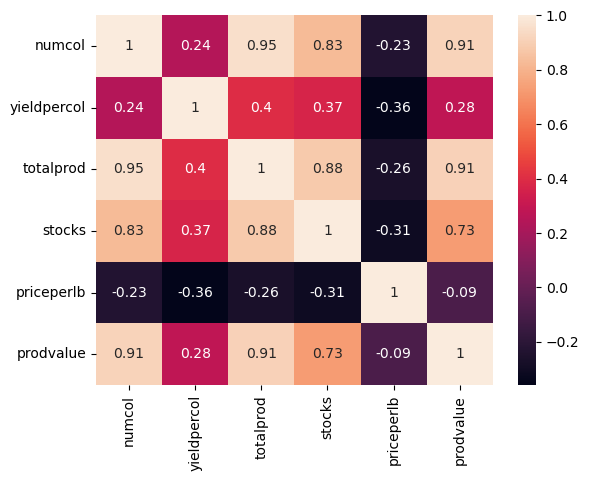

In [13]:
sns.heatmap(allcorln,annot=True)
plt.show()


In [16]:
print(nyrdata.state.nunique())

44


In [19]:
print(honi_data.year.nunique())

15


In [ ]:
sns.pointplot(x='year',y='totalprod')

/var/folders/yp/tcxqwqns2w52l01lkcdwsy6w0000gn/T/ipykernel_3572/793991343.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='year', y='totalprod', data=honi_data,estimator=sum, ci=None)


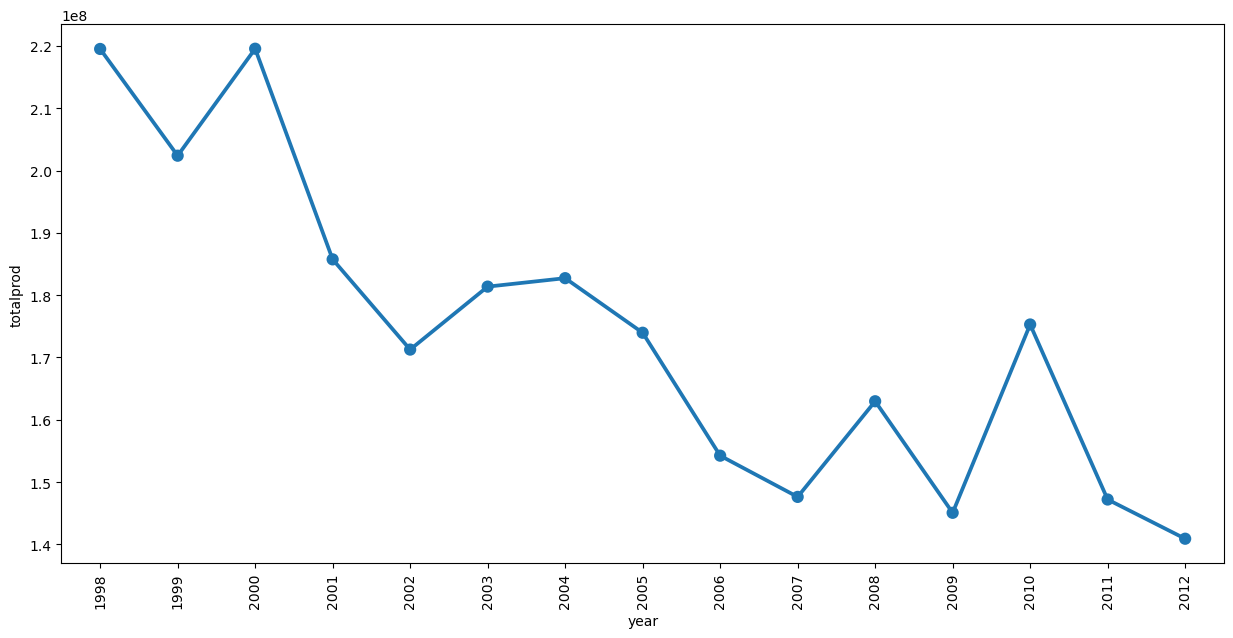

In [23]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='year', y='totalprod', data=honi_data,estimator=sum, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

Observations:<br>

The overall honey production in the US has been decresing over the years.<br>
Total honey production = number of colonies * average yield per colony. <br>Let us check if the honey production is decreasing due to one of these factors or both.

<Axes: xlabel='year', ylabel='numcol'>

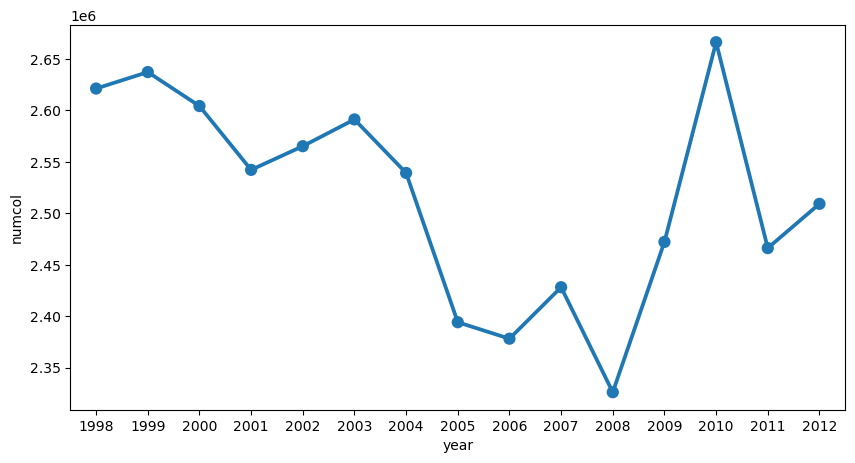

In [28]:
plt.figure(figsize=(10,5))
sns.pointplot(x='year',y='numcol',data=honi_data,estimator=sum,errorbar=None)

### Yield of honey per year percolony

<Axes: xlabel='year', ylabel='yieldpercol'>

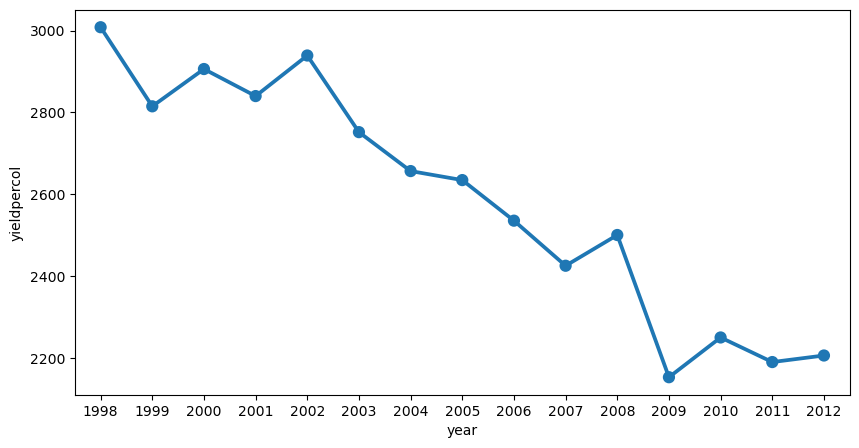

In [32]:
plt.figure(figsize=(10,5))
sns.pointplot(data=honi_data,x='year',y='yieldpercol',estimator='sum',errorbar=None)